In [48]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-16.27429476959493 68.49766387375979
-71.051576180257 68.12838626329847
21.743902319826574 106.35160137746828
-4.273366251653698 135.7973229571665
-48.556789085406294 98.22216791076403
58.69622088249085 86.2539193415796
86.14611266018886 42.289920903791455
39.285693437352535 96.0100778011469
88.86817544003489 179.87616528985745
40.27314944887809 32.45471069224115
-18.108022934915752 136.34075810135414
23.389752190590727 -87.69186477160659
-27.18651337133315 -87.50747470509101
59.3783744225517 86.79011432912898
-89.87979841599159 -130.80968328789598
-52.3526407895087 51.34640083201012
72.26498933555678 137.27052693952487
-78.21366812874572 59.72549018260756
65.35333441797067 -4.192505096877483
-29.555464548001424 -145.27229331328004
-84.17556508038884 141.7157913819127
8.887708051314064 -176.74271991901637
-55.314093001725965 56.0568053601784
-41.264712541352765 51.490182316870545
-55.99447045524894 -124.13820896220989
-6.638028679506846 -14.625002685772358
68.97361729313607 160.3061477

-17.390766740359496 20.096544064639943
52.49480283598464 12.854643817021639
35.9868057010905 102.72997309186792
-60.28468669406824 -165.8130167076129
-19.7194946160285 -78.30175702594755
7.276057105570914 -46.63861805245608
20.630776715447894 -172.94243137156715
-57.343610039612294 59.150683371029174
47.129652585523246 20.918643076731257
67.21347396114092 144.8331086622315
78.60083166010463 62.57980893673408
-50.71014158309499 157.20260947792372
53.270766177096505 -7.216652339133788
-30.55680944178038 -130.278697844987
-61.43034231499118 -64.9569845930628
-25.686656606778712 -157.38999888598264
83.8934699263531 -89.05322901111046
-75.44191489107287 92.83767570572172
-80.45358230343432 56.10712209060853
-49.75102421483159 -43.83751323259315
-7.6611352822962715 -153.21141954613555
-18.150894666938214 122.95787454962561
30.0201313500435 4.82984730325262
3.1764880592936464 -97.8285564451074
48.060738383532566 5.798028718514928
-78.3790279192977 145.68930523662084
83.73570088575613 105.0462

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
cities


['quatre cocos',
 'taolanaro',
 'lang son',
 'nabire',
 'busselton',
 'belyy yar',
 'belushya guba',
 'yumen',
 'leningradskiy',
 'ankara',
 'ngukurr',
 'panaba',
 'coquimbo',
 'rikitea',
 'nizhneyansk',
 'klaksvik',
 'mataura',
 'hobart',
 'kapaa',
 'georgetown',
 'cherskiy',
 'avarua',
 'bethel',
 'darasti-ilfov',
 'barentsburg',
 'weinan',
 'khatanga',
 'mehamn',
 'nome',
 'airai',
 'hailey',
 'tasiilaq',
 'kjollefjord',
 'geraldton',
 'manaure',
 'cairns',
 'kodiak',
 'palmer',
 'hirara',
 'hithadhoo',
 'raga',
 'cayenne',
 'great bend',
 'saint-joseph',
 'qaanaaq',
 'atuona',
 'monkey bay',
 'alofi',
 'putina',
 'okhotsk',
 'chumikan',
 'margate',
 'kutum',
 'constitucion',
 'chuy',
 'cape town',
 'severo-kurilsk',
 'vaini',
 'albany',
 'north bend',
 'santa cruz',
 'port alfred',
 'sindor',
 'petropavlovka',
 'juneau',
 'punta arenas',
 'bilibino',
 'coos bay',
 'mananjary',
 'bluff',
 'sentyabrskiy',
 'jamestown',
 'ushuaia',
 'conde',
 'bredasdorp',
 'fort nelson',
 'paragomina

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=60e3390eacf7d689fb8fed220594f948


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quatre cocos
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | lang son
Processing Record 4 of Set 1 | nabire
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | belyy yar
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | yumen
Processing Record 9 of Set 1 | leningradskiy
Processing Record 10 of Set 1 | ankara
Processing Record 11 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 12 of Set 1 | panaba
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | georgetown
Processing R

Processing Record 38 of Set 4 | pedernales
Processing Record 39 of Set 4 | abu samrah
Processing Record 40 of Set 4 | mahibadhoo
Processing Record 41 of Set 4 | maceio
Processing Record 42 of Set 4 | honiara
Processing Record 43 of Set 4 | copiapo
Processing Record 44 of Set 4 | la plaine
Processing Record 45 of Set 4 | san patricio
Processing Record 46 of Set 4 | nizhniy kuranakh
Processing Record 47 of Set 4 | praia
Processing Record 48 of Set 4 | pearl
Processing Record 49 of Set 4 | windhoek
Processing Record 50 of Set 4 | impfondo
Processing Record 1 of Set 5 | batman
Processing Record 2 of Set 5 | lasem
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | tomatlan
Processing Record 6 of Set 5 | tirumullaivasal
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | yellowknife
Processing Record 10 of Set 5 | sataua
City not found. Skipping...
Processing R

Processing Record 1 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 2 of Set 8 | hasaki
Processing Record 3 of Set 8 | markova
Processing Record 4 of Set 8 | hobyo
Processing Record 5 of Set 8 | waw
Processing Record 6 of Set 8 | sawakin
Processing Record 7 of Set 8 | marsh harbour
Processing Record 8 of Set 8 | gazojak
Processing Record 9 of Set 8 | oktyabrskoye
Processing Record 10 of Set 8 | solsvik
City not found. Skipping...
Processing Record 11 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 12 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 8 | lasa
Processing Record 14 of Set 8 | salekhard
Processing Record 15 of Set 8 | ucluelet
Processing Record 16 of Set 8 | beira
Processing Record 17 of Set 8 | saldanha
Processing Record 18 of Set 8 | tuatapere
Processing Record 19 of Set 8 | olafsvik
Processing Record 20 of Set 8 | bakchar
Processing Record 21 of Set 8 | bolshaya rechka
Processing Record 22 of Set 8 | 

Processing Record 36 of Set 11 | belmonte
Processing Record 37 of Set 11 | barcelos
Processing Record 38 of Set 11 | lebyazhye
Processing Record 39 of Set 11 | hammerfest
Processing Record 40 of Set 11 | north platte
Processing Record 41 of Set 11 | ituni
City not found. Skipping...
Processing Record 42 of Set 11 | shache
Processing Record 43 of Set 11 | bolanos de calatrava
Processing Record 44 of Set 11 | myitkyina
Processing Record 45 of Set 11 | derzhavinsk
Processing Record 46 of Set 11 | usakos
Processing Record 47 of Set 11 | richards bay
Processing Record 48 of Set 11 | kahului
Processing Record 49 of Set 11 | novyy urengoy
Processing Record 50 of Set 11 | camalu
Processing Record 1 of Set 12 | los planes
Processing Record 2 of Set 12 | kirakira
Processing Record 3 of Set 12 | camopi
Processing Record 4 of Set 12 | grand gaube
Processing Record 5 of Set 12 | nador
Processing Record 6 of Set 12 | serta
Processing Record 7 of Set 12 | saryg-sep
Processing Record 8 of Set 12 | tee

In [11]:
len(city_data)

514

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Quatre Cocos,-20.2078,57.7625,69.10,66,29,18.95,MU,2022-07-18 01:24:07
1,Lang Son,21.8333,106.7333,84.24,80,100,4.21,VN,2022-07-18 01:24:08
2,Nabire,-3.3667,135.4833,79.47,85,57,2.01,ID,2022-07-18 01:24:08
3,Busselton,-33.6500,115.3333,55.47,85,59,13.44,AU,2022-07-18 01:24:08
4,Belyy Yar,53.6039,91.3903,66.85,77,0,8.95,RU,2022-07-18 01:24:09
5,Yumen,40.2833,97.2000,75.78,29,100,21.32,CN,2022-07-18 01:24:09
6,Leningradskiy,69.3833,178.4167,33.01,90,98,21.83,RU,2022-07-18 01:22:40
7,Ankara,39.9199,32.8543,64.20,70,0,8.05,TR,2022-07-18 01:24:10
8,Panaba,21.2833,-88.2667,81.14,73,5,10.78,MX,2022-07-18 01:21:20
9,Coquimbo,-29.9533,-71.3436,51.53,81,0,6.91,CL,2022-07-18 01:24:10


In [46]:
#https://towardsdatascience.com/4-methods-for-changing-the-column-order-of-a-pandas-data-frame-a16cf0b58943
city_data_df.iloc[:, [0,7,8,1,2,3,4,5,6]]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quatre Cocos,MU,2022-07-18 01:24:07,-20.2078,57.7625,69.10,66,29,18.95
1,Lang Son,VN,2022-07-18 01:24:08,21.8333,106.7333,84.24,80,100,4.21
2,Nabire,ID,2022-07-18 01:24:08,-3.3667,135.4833,79.47,85,57,2.01
3,Busselton,AU,2022-07-18 01:24:08,-33.6500,115.3333,55.47,85,59,13.44
4,Belyy Yar,RU,2022-07-18 01:24:09,53.6039,91.3903,66.85,77,0,8.95
...,...,...,...,...,...,...,...,...,...
509,Yegorlykskaya,RU,2022-07-18 05:01:27,46.5656,40.6562,72.21,50,92,7.56
510,General Pico,AR,2022-07-18 05:01:28,-35.6566,-63.7568,43.07,43,42,6.46
511,Payerne,CH,2022-07-18 05:01:28,46.8220,6.9361,66.56,79,15,2.30
512,Dire Dawa,ET,2022-07-18 05:01:28,9.5931,41.8661,71.37,64,70,19.30


In [61]:
# Create the output file (CSV).
output_data_file = "C://Users/Carlos/BootCamp/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [62]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

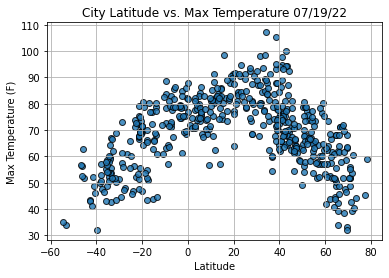

In [63]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C://Users/Carlos/BootCamp/World_Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

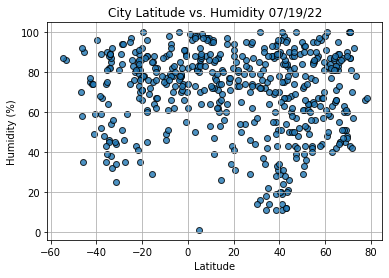

In [64]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C://Users/Carlos/BootCamp/World_Weather_Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

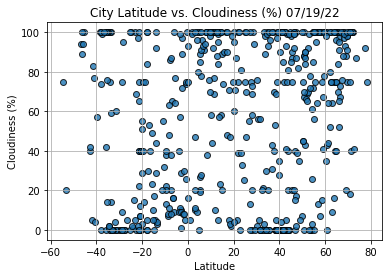

In [65]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C://Users/Carlos/BootCamp/World_Weather_Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()

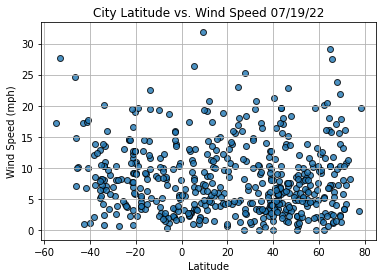

In [66]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()